In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    RMSE = [mean_squared_error(y_train, model.predict(X_train),squared=False), mean_squared_error(y_test, y_pred, squared=False)]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

In [4]:
df = pd.read_excel("var5.xlsx", engine='openpyxl')
df.head()

,Площадь загальна кв.м,Этаж,Тип,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
0,9.0,1,МАФ,2,NaN,571.0,1.56,12679.0,14910.0,0,0,0,0,0
1,30.0,1,МАФ,2,8.0,1197.0,2.03,12800.0,9030.0,0,0,0,0,0
2,15.0,1,МАФ,2,NaN,402.0,1.81,77106.0,9030.0,0,0,0,0,0
3,20.0,1,МАФ,2,NaN,1036.0,2.18,0.0,13930.0,0,0,0,0,0
4,30.0,1,Вбудоване приміщення,2,NaN,513.0,1.63,0.0,14560.0,0,0,0,0,0


In [5]:
df.shape

(69, 14)

In [6]:
df.dtypes

Площадь загальна кв.м               float64
Этаж                                  int64
Тип                                  object
Количество сотрудников в штаті        int64
Кількість відгуків в гуглі          float64
Количество чеков                    float64
Среднее количество единиц в чеке    float64
Автомобілів в день                  float64
Середній дохід населення            float64
Внутрішньоквартальна дорога           int64
Прогулянкова зона                     int64
Якість покриття перед магазином       int64
Стихійна торгівля                     int64
Зона пікніка                          int64
dtype: object

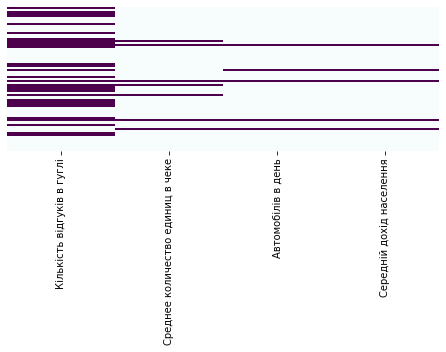

In [7]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > df.shape[0]*0.01].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),cbar=False, yticklabels=False, cmap='BuPu', ax=ax)
plt.show()

In [8]:
pd.DataFrame(df.isnull().sum())

,0
Площадь загальна кв.м,0
Этаж,0
Тип,0
Количество сотрудников в штаті,0
Кількість відгуків в гуглі,30
Количество чеков,0
Среднее количество единиц в чеке,7
Автомобілів в день,5
Середній дохід населення,5
Внутрішньоквартальна дорога,0


In [11]:
#missing data is numeric, so let's recover it accordingly
dfm = df
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(dfm[['Кількість відгуків в гуглі']]).round()
dfm[['Среднее количество единиц в чеке']] = imputer_mean.fit_transform(dfm[['Среднее количество единиц в чеке']]).round()
dfm[['Середній дохід населення']] = imputer_mean.fit_transform(dfm[['Середній дохід населення']]).round()


In [12]:
dfm.describe()

,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
count,69.000000,69.0,69.000000,69.000000,69.000000,69.000000,64.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,1.0,3.652174,42.898551,3021.576882,1.971014,25210.718750,11418.623188,0.376812,0.188406,0.115942,0.101449,0.043478
std,37.862989,0.0,1.607209,61.280489,1904.285820,0.240772,47580.292784,2433.298941,0.488137,0.393901,0.322501,0.304135,0.205425
min,4.000000,1.0,2.000000,1.000000,369.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.720000,1.0,2.000000,12.000000,1651.000000,2.000000,0.000000,10570.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.300000,1.0,4.000000,43.000000,2679.000000,2.000000,6232.500000,11419.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.240000,1.0,4.000000,43.000000,3826.000000,2.000000,18149.750000,12880.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,232.300000,1.0,8.000000,367.000000,7852.000000,3.000000,181955.000000,15470.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
dfm.corr()

,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
Площадь загальна кв.м,1.000000,NaN,0.466660,0.241902,0.326159,0.279662,0.360994,-0.320148,-0.162803,0.041859,-0.024872,-0.137155,-0.014631
Этаж,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Количество сотрудников в штаті,0.466660,NaN,1.000000,0.418608,0.741980,0.277584,0.197249,-0.220471,0.075794,0.058578,0.192435,-0.017005,-0.042605
Кількість відгуків в гуглі,0.241902,NaN,0.418608,1.000000,0.314208,0.359606,-0.094563,0.004113,-0.087194,0.099499,-0.120686,-0.116219,-0.055718
Количество чеков,0.326159,NaN,0.741980,0.314208,1.000000,0.224940,0.120945,-0.212535,0.172633,0.219020,-0.036293,0.052079,-0.011869
Среднее количество единиц в чеке,0.279662,NaN,0.277584,0.359606,0.224940,1.000000,-0.052427,-0.166488,0.094297,0.058428,0.043916,-0.360905,0.025854
Автомобілів в день,0.360994,NaN,0.197249,-0.094563,0.120945,-0.052427,1.000000,-0.026198,-0.268887,-0.246189,0.045544,-0.019283,-0.086753
Середній дохід населення,-0.320148,NaN,-0.220471,0.004113,-0.212535,-0.166488,-0.026198,1.000000,-0.146642,-0.066160,-0.175760,0.073915,0.052783
Внутрішньоквартальна дорога,-0.162803,NaN,0.075794,-0.087194,0.172633,0.094297,-0.268887,-0.146642,1.000000,0.313689,0.185477,0.134947,-0.019129
Прогулянкова зона,0.041859,NaN,0.058578,0.099499,0.219020,0.058428,-0.246189,-0.066160,0.313689,1.000000,-0.174485,-0.161894,0.079017


In [14]:
dfm.Этаж.value_counts() # Корреляция отсутствует так как значение не изменно

1    69
Name: Этаж, dtype: int64

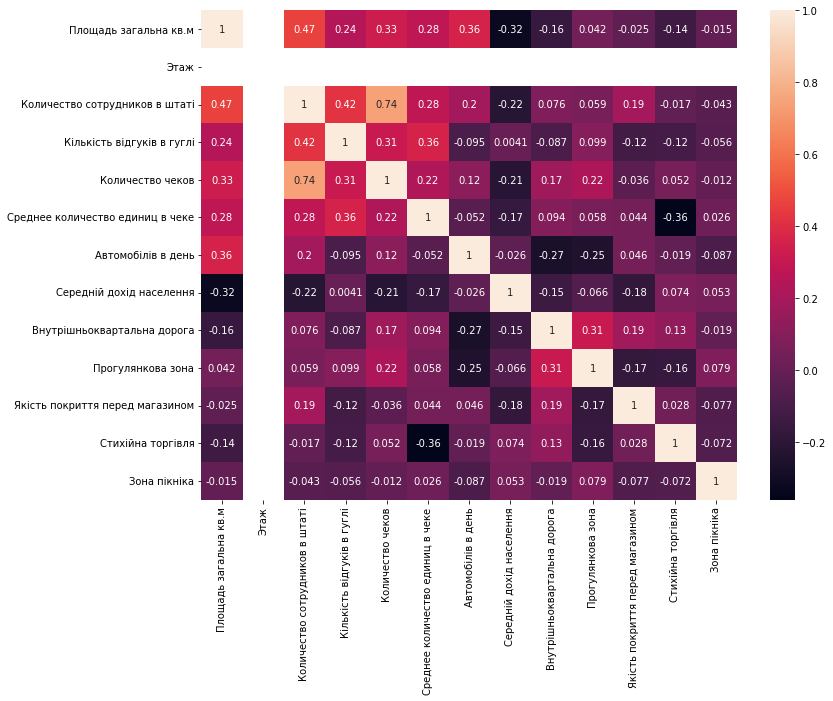

In [15]:
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Найбольшая корреляция между количеством чеков и количеством сотрудников в штате, так же на эти данные незначительно влияет Кількість відгуків в гуглі (однако в этих данных было очень много нан значение и использывать их для модели не рекомендуеться).

In [16]:

#encoding
dfs = dfm[['Тип']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Тип,3,"[МАФ, Вбудоване приміщення, Острівок на ринку]",object


In [17]:
type_ = {'МАФ':0,'Вбудоване приміщення':0,'Острівок на ринку':1}
dfm['Тип'] = dfm['Тип'].map(type_)
dfm

,Площадь загальна кв.м,Этаж,Тип,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
0,9.00,1,0,2,43.0,571.0,2.0,12679.0,14910.0,0,0,0,0,0
1,30.00,1,0,2,8.0,1197.0,2.0,12800.0,9030.0,0,0,0,0,0
2,15.00,1,0,2,43.0,402.0,2.0,77106.0,9030.0,0,0,0,0,0
3,20.00,1,0,2,43.0,1036.0,2.0,0.0,13930.0,0,0,0,0,0
4,30.00,1,0,2,43.0,513.0,2.0,0.0,14560.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,1,0,6,4.0,6669.0,2.0,146.0,9800.0,1,0,0,0,0
65,27.26,1,0,4,3.0,2877.0,2.0,6661.0,12600.0,0,0,0,0,0
66,148.91,1,0,2,12.0,2146.0,2.0,9500.0,10570.0,0,1,0,0,0
67,50.93,1,0,3,17.0,413.0,2.0,0.0,12460.0,0,0,0,0,0


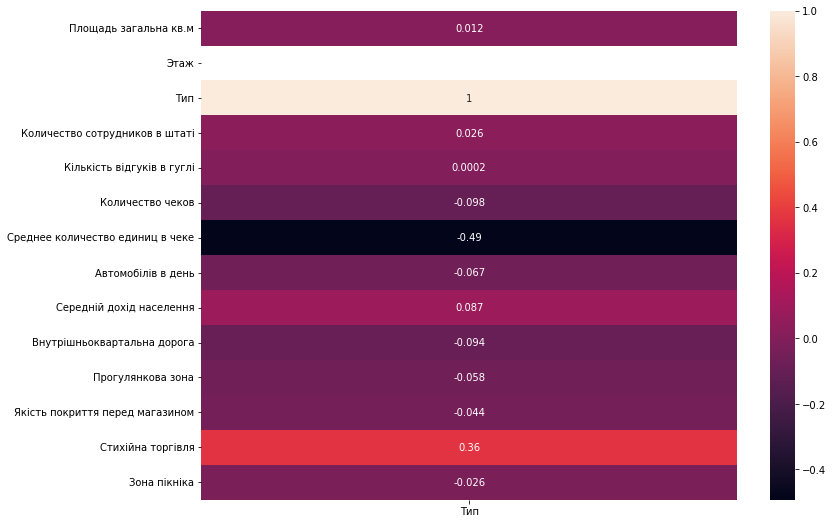

In [18]:
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat[['Тип',]], annot=True)
plt.show()

Значительной корреляции с типом нет.

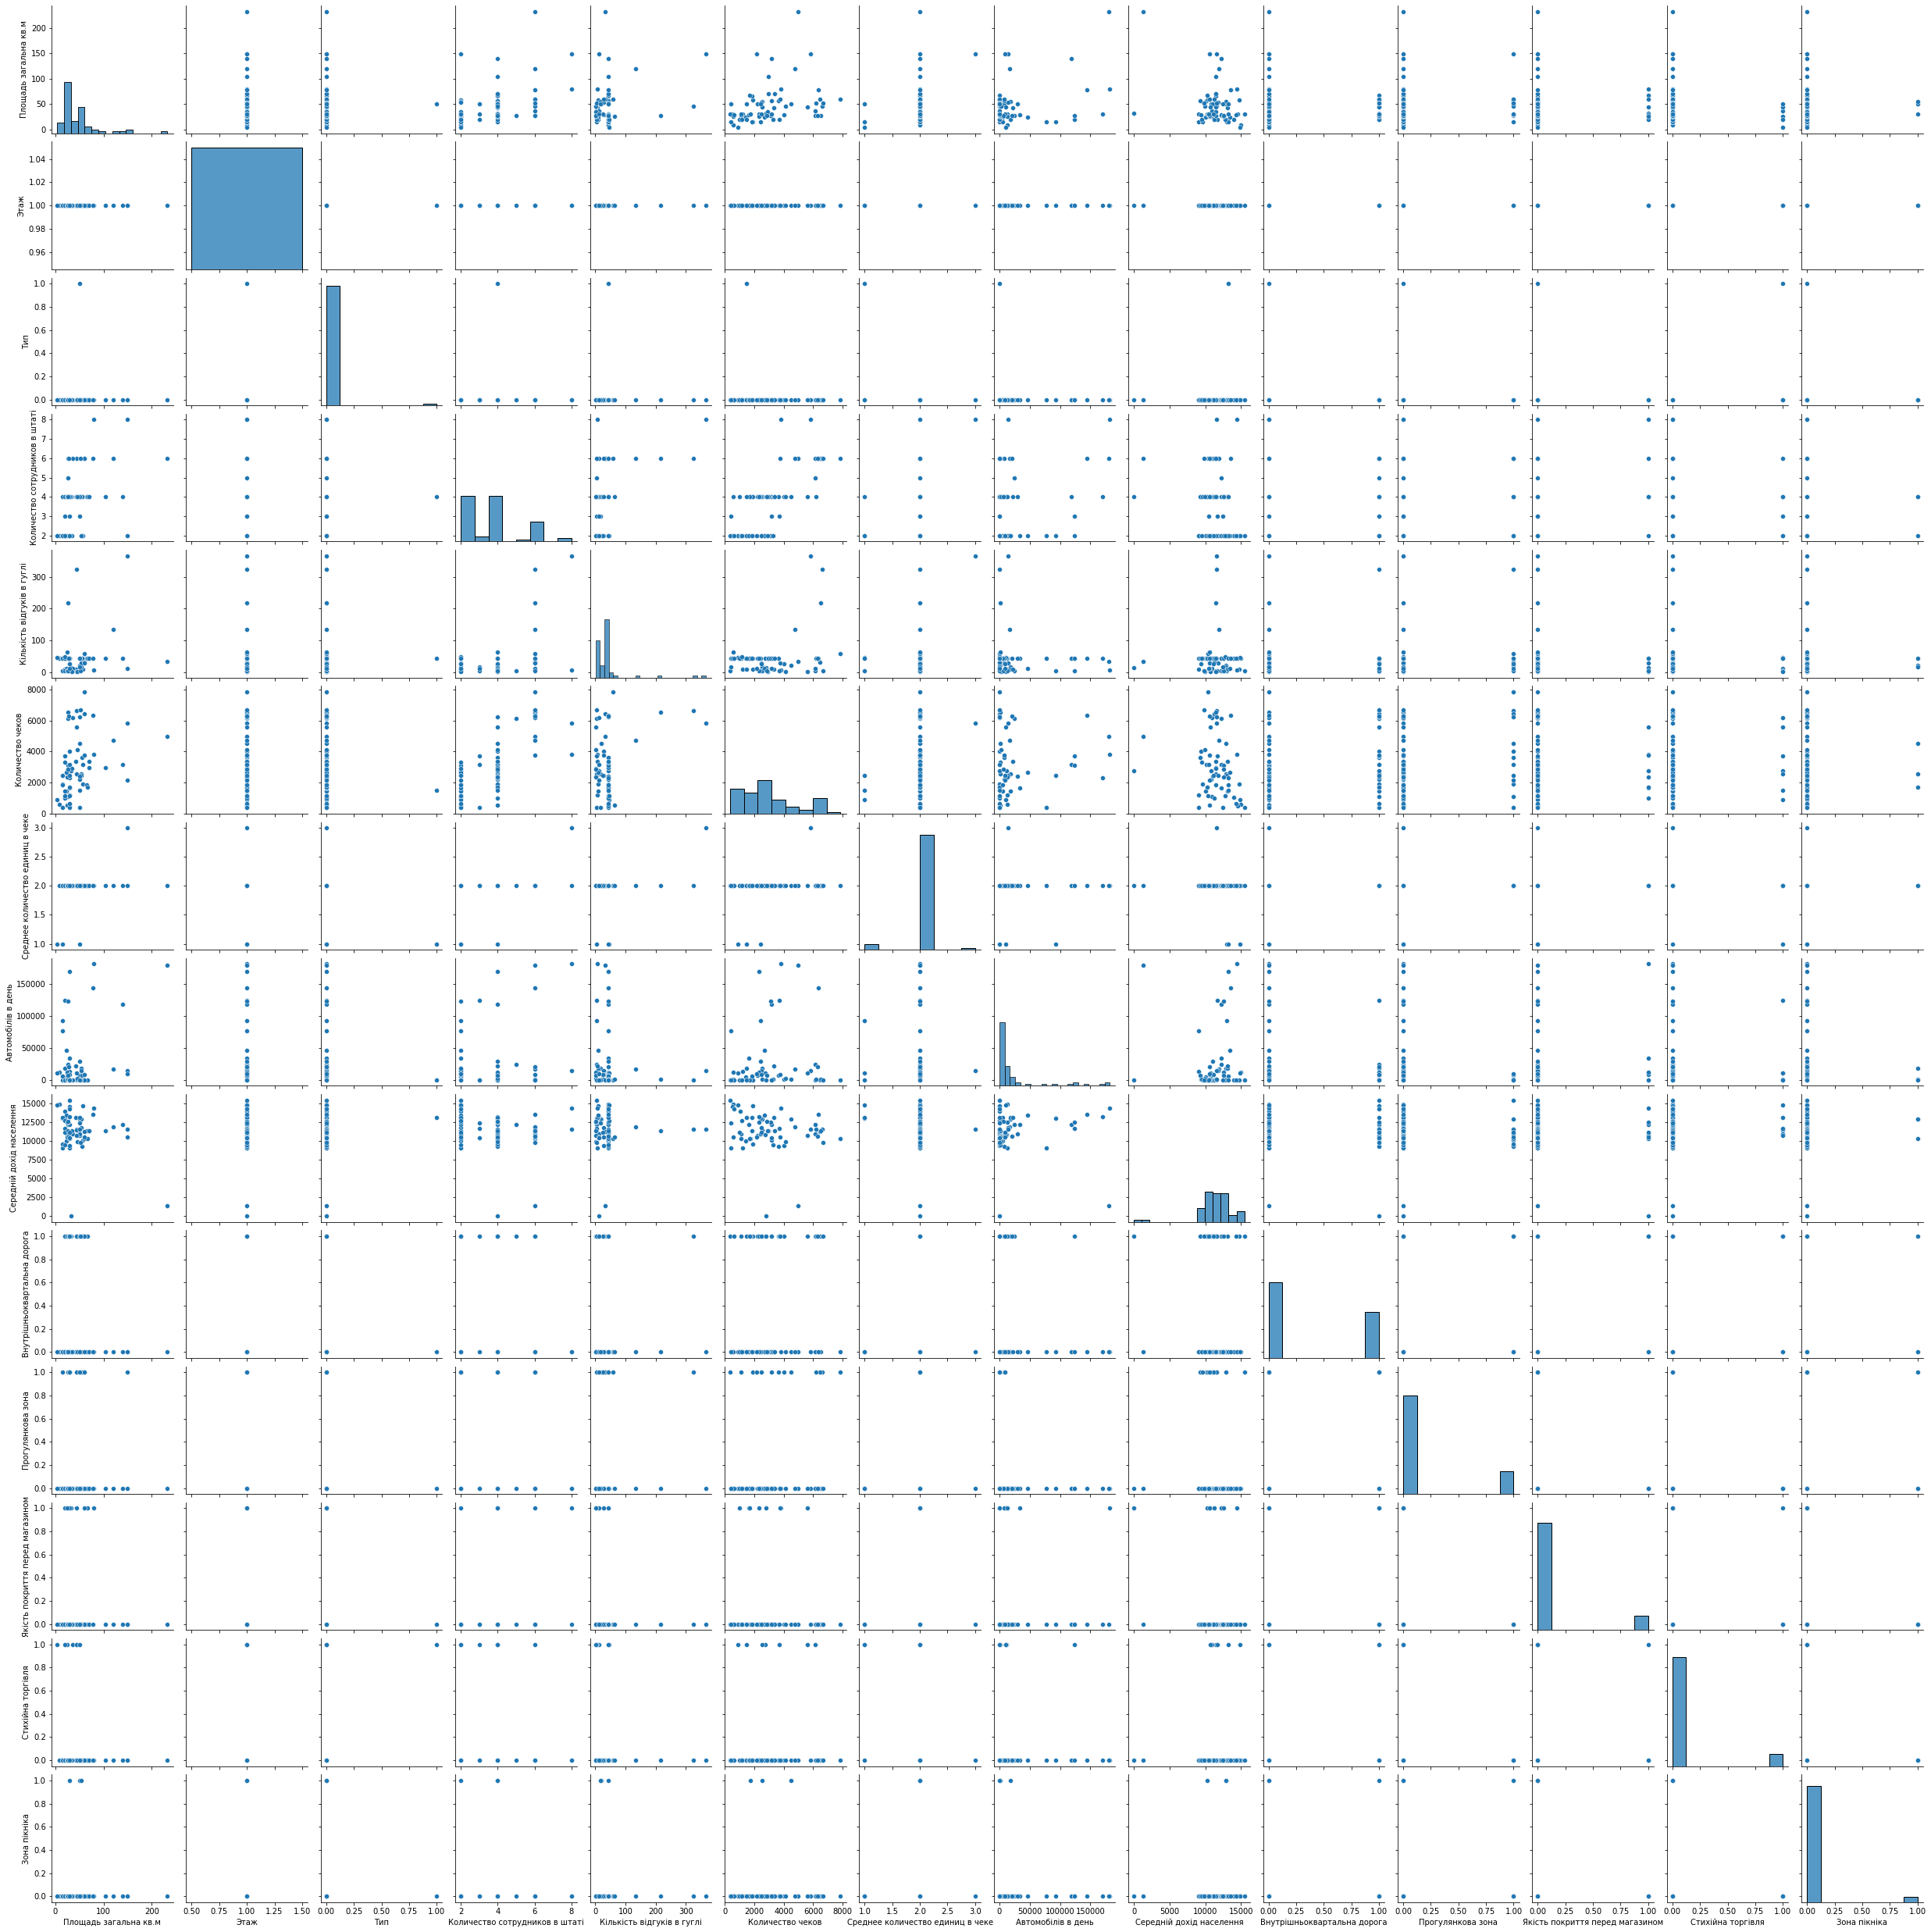

In [19]:
sns.pairplot(dfm)

Modeling

In [21]:
#linear regression
#Splitting the dataset into the Training set and Test set
feature_name = ['Количество сотрудников в штаті','Среднее количество единиц в чеке','Внутрішньоквартальна дорога','Прогулянкова зона']
X =dfm[feature_name]
y = dfm['Количество чеков']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [23]:

# Fitting Simple Linear Regression to the Training set
f1 = ['Количество сотрудников в штаті']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([843.67004778]), -7.4386834615379485)

In [24]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.517, 0.646)

In [25]:
print(mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

1343.17


926.47

In [26]:
# Fitting Linear Regression based on 5 features to the Training set

from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

# Getting parameters
mr.coef_, mr.intercept_

(array([ 871.83705952, -926.01117856,  329.907729  ,  589.33716295]),
 1488.230632358353)

In [27]:
# Predicting the Test set results
y_pred2 = mr.predict(X_test)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3), mr.score(X_test, y_test).round(3)

(0.556, 0.557)

In [28]:
print(mean_squared_error(y_train, mr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred2, squared=False).round(2)

1288.74


1036.04

Если сравнивать с прошлой линейной регресией, многофакторная модель лучше справляеться со своей задачей.

In [29]:
# Checking p-values
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.pvalues

const                               4.475915e-01
Количество сотрудников в штаті      1.588428e-09
Среднее количество единиц в чеке    3.680900e-01
Внутрішньоквартальна дорога         4.267179e-01
Прогулянкова зона                   2.491756e-01
dtype: float64

In [30]:
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Количество чеков   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     15.63
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           2.33e-08
Time:                        18:33:26   Log-Likelihood:                -471.92
No. Observations:                  55   AIC:                             953.8
Df Residuals:                      50   BIC:                             963.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1488.2306   1944.211      0.765      0.448   -2416.832    5393.294
Количество сотрудников в штаті     871.8371    118.305      7.369      0.000     634.214    1109.461
Среднее количество единиц в чеке  -926.0112   1019.527     -0.908      0.368   -2973.791    1121.769
Внутрішньоквартальна дорога        329.9077    411.687      0.801      0.427    -496.990    1156.806
Прогулянкова зона                  589.3372    505.467      1.166      0.249    -425.923    1604.597
==============================================================================
Omnibus:                        2.483   Durbin-Watson:                   2.269
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.515
Skew:                          -0.111   Prob(JB):                        0.469
Kurtosis:                       2.218   Cond. No.                         55.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Fitting Polynomial Regression to the dataset
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 871.83705952, -926.01117856,  329.907729  ,  589.33716295]),
 1488.230632358353)

In [32]:
# Predicting the Test set results
y_pred = pr.predict(X_test)

# Coefficient of determination R^2
pr.score(X_train, y_train).round(3), pr.score(X_test, y_test).round(3)

(0.556, 0.557)

In [33]:
# Mean squared error
print(mean_squared_error(y_train, pr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

1288.74


1036.04

In [36]:
# Fitting Random Forest to the Training set
rf = RandomForestRegressor(n_estimators = 2, max_leaf_nodes = 25, random_state = 10).fit(X_train, y_train)

# Predicting the Test set results
rf_y_pred = rf.predict(X_test)

# Metrics
metrics(X_train, X_test, y_train, y_test, rf_y_pred, rf).round(2)

,RMSE,R2
Train,1138.43,0.65
Test,1063.95,0.53


In [35]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature_, round(importance, 2)) for feature_, importance in zip(feature_name, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Количество сотрудников в штаті Importance: 0.82
Variable: Внутрішньоквартальна дорога Importance: 0.1
Variable: Прогулянкова зона    Importance: 0.06
Variable: Среднее количество единиц в чеке Importance: 0.02


Выводы:
Мы видим что все модели имеют плохие показатели R2.

Смотря на данные можем сказать что их количества не достаточно для создания качественной модели. Всего 69 примеров, очень мало. Количество отсутствующих значений(NaN) слишком большае для "Кількість відгуків в гуглі" >45%, мы не можем использовать эти данные в моделировании.

Исходя из R2 лучшей моделью будет Random Forest.